In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Prepare Data

In [3]:
# Load dataset

wine_df = pd.read_csv('../data/winequality-red.csv')
print("Data load!")

Data load!


In [4]:
# Show head features

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Show number of elements

wine_df.shape

(1599, 12)

In [6]:
# Show data information

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Check missing data

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Data descriptions

wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Show feature quality info for visualisation model to train

wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Creating ML algorithm

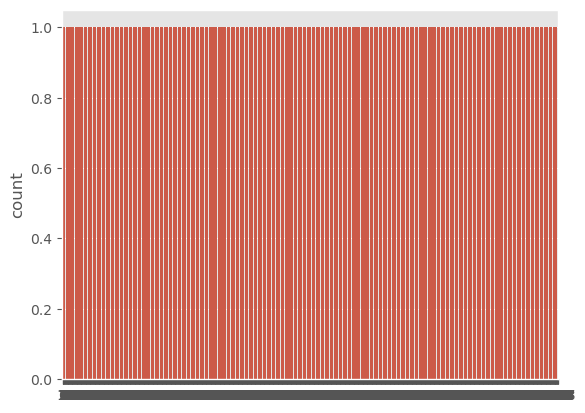

In [10]:
# Visualize the distribution of wine quality ratings in dataset.

style.use('ggplot')
sns.countplot(wine_df['quality'])
plt.show()

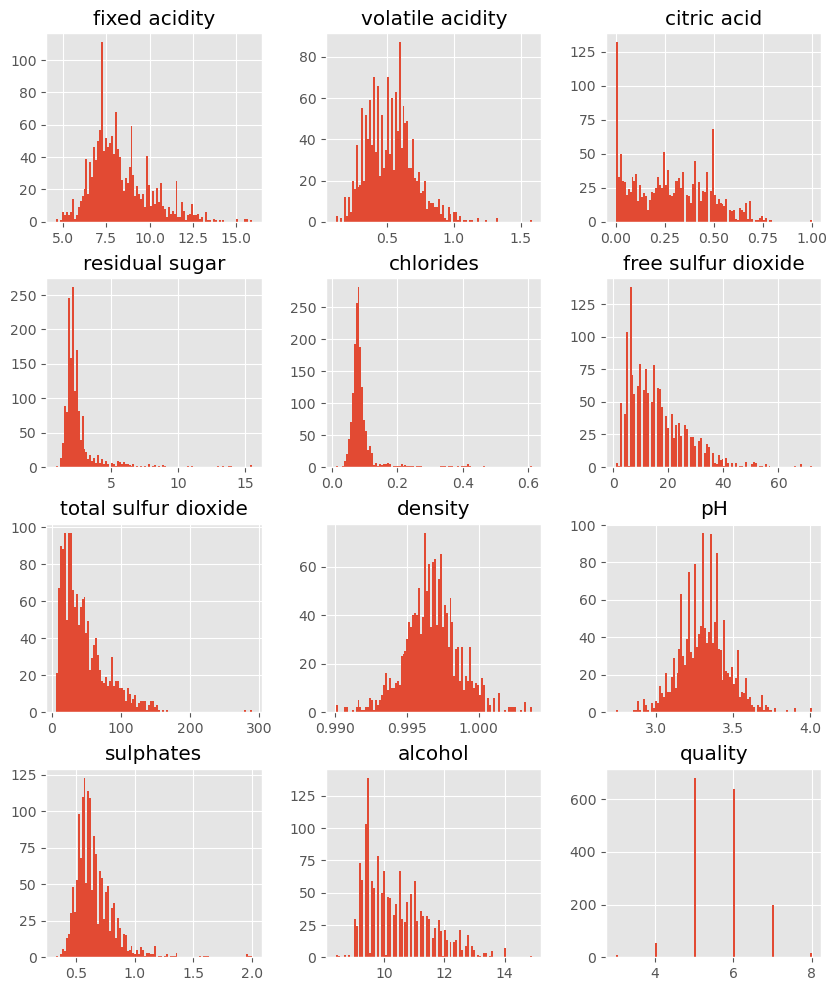

In [11]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

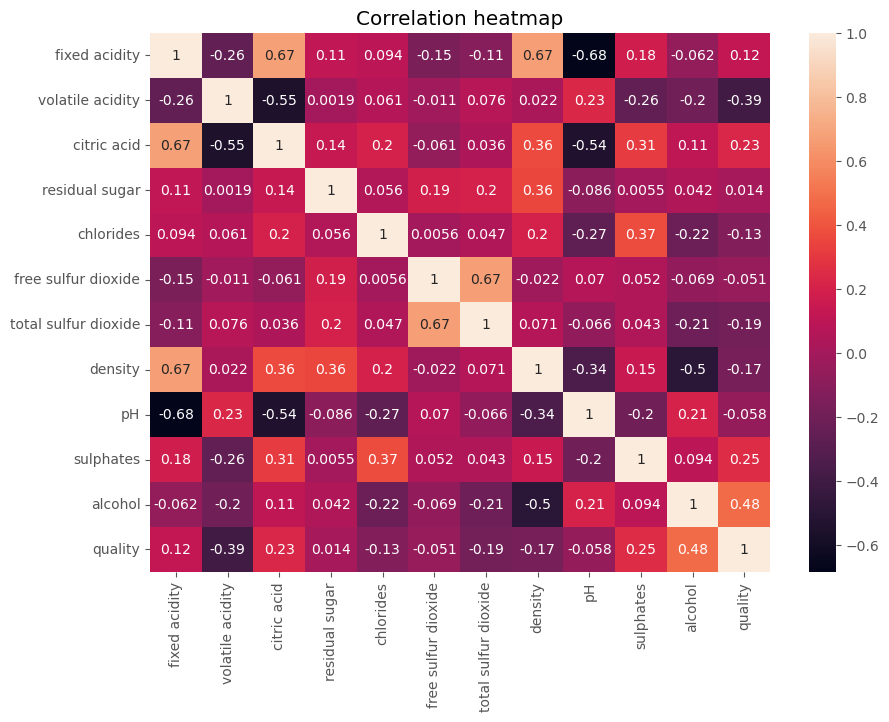

In [12]:
# Plot heatmap magnitude of data values

plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation heatmap')
plt.show()

In [13]:
# Features are most positively or negatively

wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

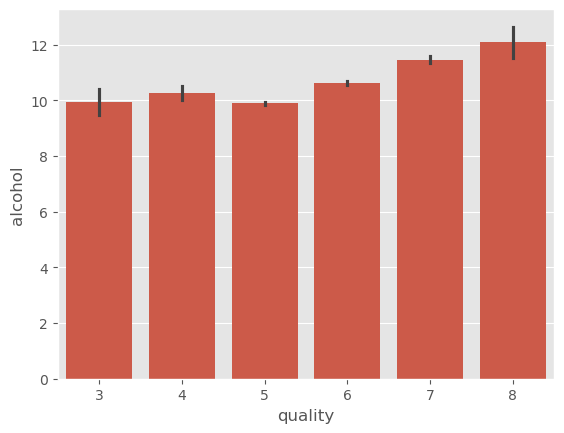

In [14]:
# Average alcohol content varies across different wine quality levels

sns.barplot(x='quality', y='alcohol', data=wine_df)
plt.show()

In [15]:
# classification approach

# If the original quality score is 7 or higher, it sets the value to 1 (good quality)
# If the score is less than 7, it sets the value to 0 (not good quality)

wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

In [16]:
wine_df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [17]:
# Separate data req by ML algorithm

X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [18]:
# Split data into 70/30 rule

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


## Model Training

### logistic Regression model

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 86.67%


In [21]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.56      0.22      0.32        67

    accuracy                           0.87       480
   macro avg       0.72      0.60      0.62       480
weighted avg       0.84      0.87      0.84       480



TN:  401
FN:  52
TP:  15
FP:  12


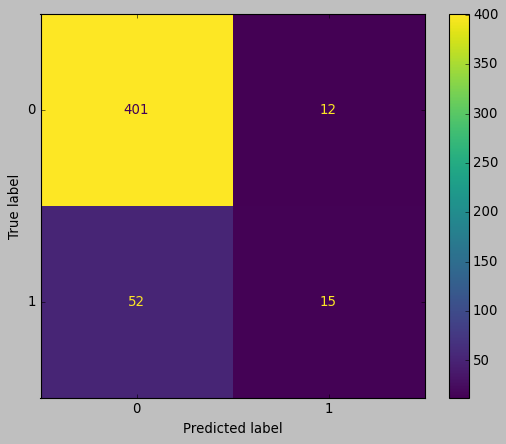

In [30]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

plt.show()

### Decision Tree

In [40]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 87.50%


In [39]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.51      0.66      0.57        67

    accuracy                           0.86       480
   macro avg       0.72      0.78      0.74       480
weighted avg       0.88      0.86      0.87       480



TN:  368
FN:  26
TP:  41
FP:  45


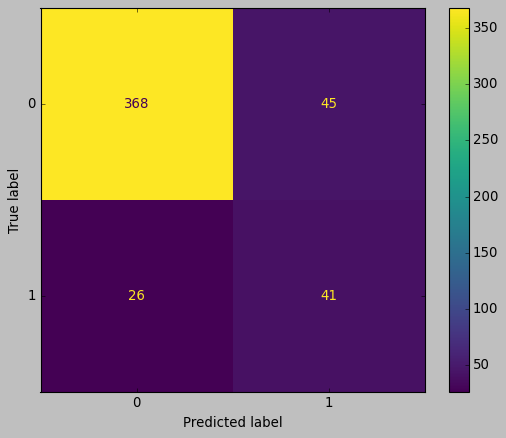

In [33]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

plt.show()

### Random Forest

In [51]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 90.00%


In [52]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       413
           1       0.68      0.54      0.60        67

    accuracy                           0.90       480
   macro avg       0.80      0.75      0.77       480
weighted avg       0.89      0.90      0.89       480



TN:  396
FN:  31
TP:  36
FP:  17


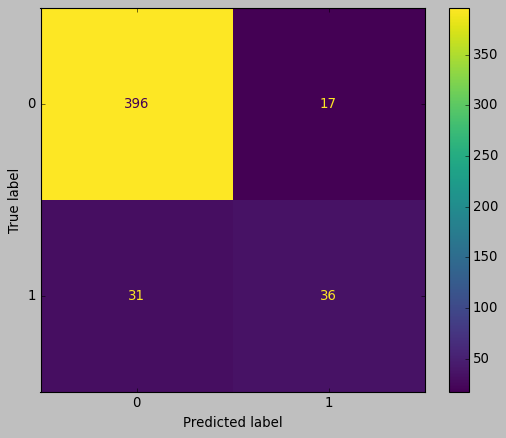

In [53]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

plt.show()

In [56]:
# Save model

import joblib

joblib.dump(logreg, 'wine_quality_logistic_model.pkl')
joblib.dump(dtree, 'wine_quality_decision_tree_model.pkl')
joblib.dump(rforest, 'wine_quality_random_forest_model.pkl')

['wine_quality_random_forest_model.pkl']